In [1]:
import pandas as pd
import os

In [2]:
def calculate_values(df,method):
    # データ範囲を取得
    data = df.values
    # print(data)
    # 結果を出力する
    results=[]
    place_value=0
    row_count=0
    place_values=[[0.25, -0.1, -0.025],
 [0.25, -0.1, 0.075],
 [0.25, -0.1, 0.175],
 [0.25, 0.0, -0.025],
 [0.25, 0.0, 0.075],
 [0.25, 0.0, 0.175],
 [0.25, 0.1, -0.025],
 [0.25, 0.1, 0.075],
 [0.25, 0.1, 0.175],
 [0.35, -0.1, -0.025],
 [0.35, -0.1, 0.075],
 [0.35, -0.1, 0.175],
 [0.35, 0.0, -0.025],
 [0.35, 0.0, 0.075],
 [0.35, 0.0, 0.175],
 [0.35, 0.1, -0.025],
 [0.35, 0.1, 0.075],
 [0.35, 0.1, 0.175],
 [0.45, -0.1, -0.025],
 [0.45, -0.1, 0.075],
 [0.45, -0.1, 0.175],
 [0.45, 0.0, -0.025],
 [0.45, 0.0, 0.075],
 [0.45, 0.0, 0.175],
 [0.45, 0.1, -0.025],
 [0.45, 0.1, 0.075],
 [0.45, 0.1, 0.175]]
    # print(data)
    for i in range(len(data)):
        if isinstance(data[i][0],str) and data[i][0].startswith("place index:"):
            place_text,place_value=data[i][0].split(":")
            place_value=int(place_value)
            row_count=0
        else:
            results.append([
                row_count,
                method,
                place_value,
                abs(float(data[i][0])-place_values[place_value][0]),
               abs(float(data[i][1])-place_values[place_value][1]),
              abs(float(data[i][2])-place_values[place_value][2]),
                ])
            row_count+=1
    return results
            
    
    
    

In [3]:
# .txtファイルからデータを読み込む
def read_txt_to_dataframe(file_path):
    # ファイルを読み込み、各行をリストに格納
    with open(file_path, 'r', encoding='utf-8-sig') as file:
        lines = file.readlines()

    # 各行をカンマで分割してデータフレームに変換
    data = [line.strip().split(',') for line in lines]

    # データフレームに変換
    df = pd.DataFrame(data)
    return df

In [4]:
import os
from datetime import datetime

# ファイルの作成日時を取得する関数
def get_creation_time(file_name):
    return os.path.getctime(file_name)


In [5]:
root_path = r"C:\Users\takaharayota\Research\Semi-Exp3\01Length\河合"
files_paths = [   
        root_path + r"\NoSound_0.1.txt",
          root_path + r"\Dense_0.1.txt",
          root_path + r"\Sparse_0.1.txt",
       
    
]

# 全てのフォルダを処理し、結果を統合
all_results = []
for i, file_path in enumerate(files_paths):
        method=i-1
        df = read_txt_to_dataframe(file_path)
        all_results.extend(calculate_values(df, method))
    
print(all_results)  


# 統合されたデータをデータフレームに変換
columns = ['Subject','Method', 'Place', 'X', 'Y', 'Z']
df_all = pd.DataFrame(all_results, columns=columns)

# データの表示
# DataFrameを.txtファイルに出力
df_all.to_csv('output.txt', sep='\t', index=False)

print("DataFrameの内容がoutput.txtに出力されました。")

[[0, -1, 24, 0.05125569999999996, 0.10743651000000001, 0.05981828], [0, -1, 8, 0.010286599999999979, 0.010313199999999995, 0.05594169999999998], [0, -1, 15, 0.03658100000000003, 0.02264418, 0.023119334000000002], [0, -1, 3, 0.031613699999999995, 0.0008292273, 0.0052708200000000024], [0, -1, 9, 0.005157000000000023, 0.03589097000000001, 0.01993267], [0, -1, 3, 0.035767400000000005, 0.01457673, 0.00794645], [0, -1, 26, 0.030423199999999984, 0.031379500000000005, 0.038035100000000016], [0, -1, 23, 0.03485159999999998, 0.001282696, 0.0501809], [0, -1, 26, 0.09209050000000002, 0.042837700000000006, 0.05248130000000001], [0, -1, 15, 0.015283000000000047, 0.028856099999999996, 0.05347542], [0, -1, 10, 0.0354101, 0.048343840000000006, 0.0406189], [0, -1, 4, 0.010923499999999975, 0.01021299, 0.0400283], [0, -1, 7, 0.026940799999999987, 0.009123200000000012, 0.0365186], [0, -1, 6, 0.024372999999999978, 0.004779430000000001, 0.018153831000000002], [0, -1, 14, 0.05862400000000001, 0.003371488, 0.0

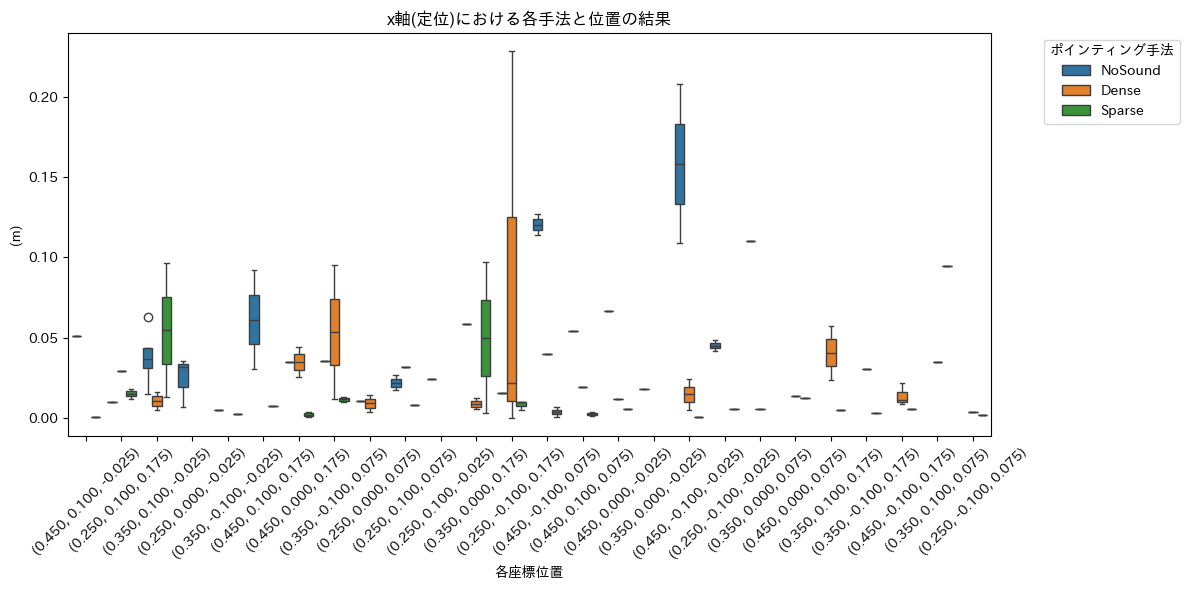

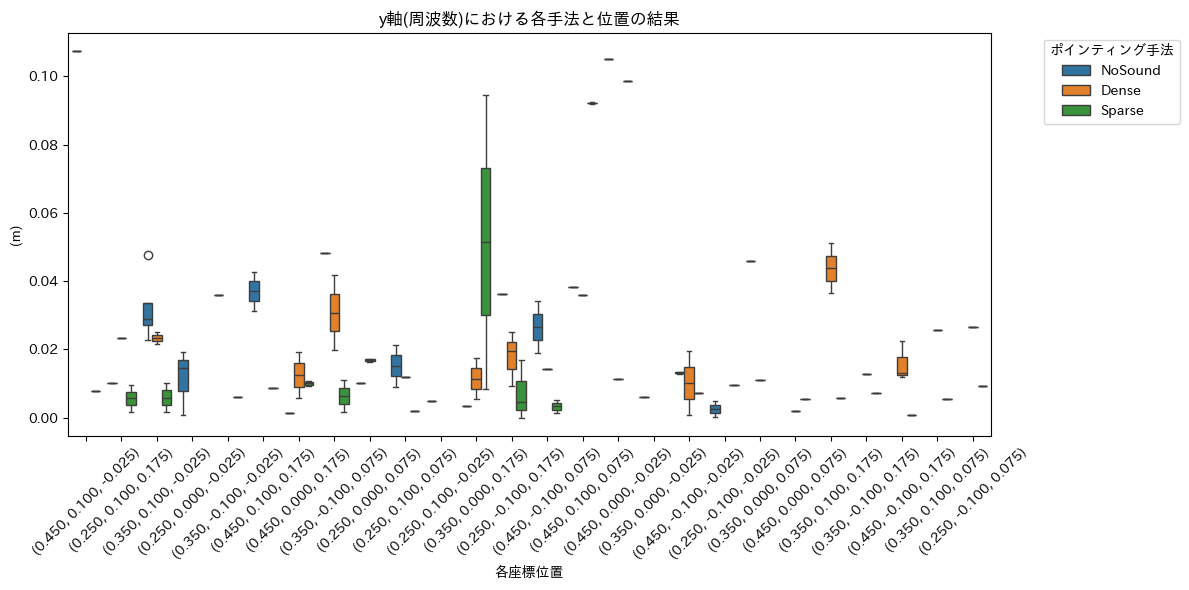

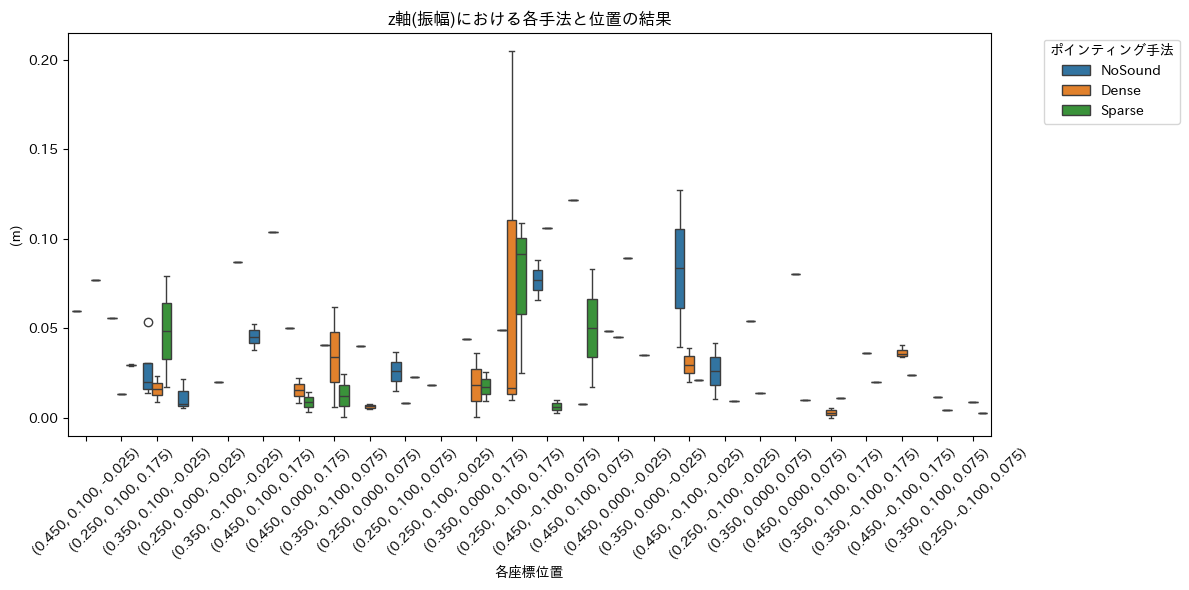

In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# データフレームの例
# df_all = pd.DataFrame(...)

# Method と Place の具体的な意味をラベルに追加する
method_labels = {
    0: 'Dense',
    1: 'Sparse',
    -1: 'NoSound',
   
  
    
    

}

place_labels ={0: '(0.250, -0.100, -0.025)',
 1: '(0.250, -0.100, 0.075)',
 2: '(0.250, -0.100, 0.175)',
 3: '(0.250, 0.000, -0.025)',
 4: '(0.250, 0.000, 0.075)',
 5: '(0.250, 0.000, 0.175)',
 6: '(0.250, 0.100, -0.025)',
 7: '(0.250, 0.100, 0.075)',
 8: '(0.250, 0.100, 0.175)',
 9: '(0.350, -0.100, -0.025)',
 10: '(0.350, -0.100, 0.075)',
 11: '(0.350, -0.100, 0.175)',
 12: '(0.350, 0.000, -0.025)',
 13: '(0.350, 0.000, 0.075)',
 14: '(0.350, 0.000, 0.175)',
 15: '(0.350, 0.100, -0.025)',
 16: '(0.350, 0.100, 0.075)',
 17: '(0.350, 0.100, 0.175)',
 18: '(0.450, -0.100, -0.025)',
 19: '(0.450, -0.100, 0.075)',
 20: '(0.450, -0.100, 0.175)',
 21: '(0.450, 0.000, -0.025)',
 22: '(0.450, 0.000, 0.075)',
 23: '(0.450, 0.000, 0.175)',
 24: '(0.450, 0.100, -0.025)',
 25: '(0.450, 0.100, 0.075)',
 26: '(0.450, 0.100, 0.175)'}
# Method と Place のラベルをデータフレームに追加
df_all['Method_Label'] = df_all['Method'].map(method_labels)
df_all['Place_Label'] = df_all['Place'].map(place_labels)

# 可視化
plt.figure(figsize=(12, 6))
sns.boxplot(x='Place_Label', y='X', hue='Method_Label', data=df_all)
plt.title('x軸(定位)における各手法と位置の結果')
plt.xlabel('各座標位置')
plt.ylabel('(m)')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Place_Label', y='Y', hue='Method_Label', data=df_all)
plt.title('y軸(周波数)における各手法と位置の結果')
plt.xlabel('各座標位置')
plt.ylabel('(m)')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Place_Label', y='Z', hue='Method_Label', data=df_all)
plt.title('z軸(振幅)における各手法と位置の結果')
plt.xlabel('各座標位置')
plt.ylabel('(m)')
plt.legend(title='ポインティング手法', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
